# Bike Sharing Demand Chap1



시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 **시간(새벽보다 낮에 많이 빌리겠죠)**, **날씨(비가 오면 자전거를 대여하지 않을 겁니다)**, **근무일(근무 시간에는 자전거를 대여하지 않겠죠)** 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

In [2]:
# 필요한 패키지를 import 하는 구간
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [3]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 1000으로 설정합니다.
pd.set_option('display.max_rows', 1000)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 1000으로 설정합니다.
pd.set_option('display.max_columns', 1000)

In [4]:
import matplotlib
from IPython.display import set_matplotlib_formats

# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='NanumGothic')

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 속성(컬럼) 설명(Column explain)

 * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
 * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
 * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
 * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
 * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
   * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
   * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
   * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
   * 4: 아주 많은 비가 오거나 우박이 내립니다.
 * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
 * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
 * **humidity** - 습도.
 * **windspeed** - 풍속.
 * **casual** - 비회원(non-registered)의 자전거 대여량.
 * **registered** - 회원(registered)의 자전거 대여량.
 * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.

### 데이터 셋 로드(Load Dataset)

In [5]:
# 데이터 셋을 로드하는 커널입니다
# 각각 data 폴더 내에 있는 train.csv, test.csv파일을 불러옵니다
# parse_dates : datetime 컬럼을 실제 날짜 처럼 연산하게 parsing 처리합니다
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])

# 불러온 train데이터를 확인합니다.
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# 불러온 test 데이터를 확인합니다.
print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 데이터 전처리(Data Preprocessing)

머신러닝 알고리즘에 대입하기 위해 데이터 전처리(Preprocessing) 작업을 진행합니다.
여기서 사용할 데이터는 대부분의 데이터가 전처리 되어 있습니다.(예를 들면 season 컬럼을 봤을 때 "Spring"과 같이 문자열로 표현하지 않고 1(정수)로 처리가 되어 있습니다) 따라서 몇가지 간단한 처리만 해주게 되면 바로 머신러닝 모델에 대입할 수 있습니다.

### Parse datetime

날짜 컬럼을 확인해 보면 여러개의 숫자로 되어 있습니다(연-월-일 시:분:초). 하지만 이 데이터는 숫자 처럼 보이지만 숫자는 아닙니다(자료형 : object, datetime64, 해당 값에 하이픈(-), 콜론(:)이 있기 때문) 따라서 머신러닝 알고리즘이 적용될 수 있게 숫자형 데이터로 전처리를 해야 합니다.

간단하게 연, 월, 시, 분, 초를 따로 나누는 작업입니다.(6개의 다른 컬럼으로 나누어 전처리)

In [7]:
# train 데이터 전처리
# 먼저 datetime 데이터 처리 : 연, 월, 일, 시간, 분, 초 등으로 처리
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

# dayofweek : 날짜에서 요일(월~일)을 가져오는 기능
# 해당 값은 0(월) ~ 6(일)로 정의되어 있다.
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute",
       "datetime-second"]].head()

(10886, 19)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [8]:
# test 데이터 전처리
# train과 동일하게 진행합니다.
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second

# 요일의 정보를 추가합니다.
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute",
       "datetime-second"]].head()

(6493, 16)


,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,20,0,0,0
1,2011,1,20,1,0,0
2,2011,1,20,2,0,0
3,2011,1,20,3,0,0
4,2011,1,20,4,0,0


In [9]:
print(train.shape)
train.head()

print(test.shape)
test.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


In [11]:
# dayofweek가 정수값으로 나타내어져 있어 실제 데이터분석에 다소 불편한 감이 있습니다
# 따라서 사람이 알아보기 쉬운 Mon, Tue, ... , Sun 값으로 바꾸는 과정입니다.
# train 데이터
train.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(hum)"] = "Monday"
train.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(hum)"] = "Tuesday"
train.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(hum)"] = "Wednesday"
train.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(hum)"] = "Thursday"
train.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(hum)"] = "Friday"
train.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(hum)"] = "Saturday"
train.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(hum)"] = "Sunday"

print(train.shape)
train[["datetime", "datetime-dayofweek", "datetime-dayofweek(hum)"]].head()

(10886, 20)


,datetime,datetime-dayofweek,datetime-dayofweek(hum)
0,2011-01-01 00:00:00,5,Saturday
1,2011-01-01 01:00:00,5,Saturday
2,2011-01-01 02:00:00,5,Saturday
3,2011-01-01 03:00:00,5,Saturday
4,2011-01-01 04:00:00,5,Saturday


In [12]:
# test 데이터
test.loc[train["datetime-dayofweek"] == 0, "datetime-dayofweek(hum)"] = "Monday"
test.loc[train["datetime-dayofweek"] == 1, "datetime-dayofweek(hum)"] = "Tuesday"
test.loc[train["datetime-dayofweek"] == 2, "datetime-dayofweek(hum)"] = "Wednesday"
test.loc[train["datetime-dayofweek"] == 3, "datetime-dayofweek(hum)"] = "Thursday"
test.loc[train["datetime-dayofweek"] == 4, "datetime-dayofweek(hum)"] = "Friday"
test.loc[train["datetime-dayofweek"] == 5, "datetime-dayofweek(hum)"] = "Saturday"
test.loc[train["datetime-dayofweek"] == 6, "datetime-dayofweek(hum)"] = "Sunday"

print(test.shape)
test[["datetime", "datetime-dayofweek", "datetime-dayofweek(hum)"]].head()

(6493, 17)


,datetime,datetime-dayofweek,datetime-dayofweek(hum)
0,2011-01-20 00:00:00,3,Saturday
1,2011-01-20 01:00:00,3,Saturday
2,2011-01-20 02:00:00,3,Saturday
3,2011-01-20 03:00:00,3,Saturday
4,2011-01-20 04:00:00,3,Saturday


### One-Hot-Encoding

머신러닝 알고리즘을 돌릴 때 수치 데이터의 합에 의한 잘못된 학습을 방지하고자 **One-Hot-Encoding**이 필요한 컬럼 값에 대해 전처리를 진행합니다.

In [18]:
# One-Hot-Encoding을 진행할 컬럼 값  : season, weather, datetime-dayofweek(수치값)
# train데이터에 대한 One-Hot-Encoding
# train : season
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

# train : weather
train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

# train : datetime-dayofweek
train["dayofweek_0"] = train["datetime-dayofweek"] == 0
train["dayofweek_1"] = train["datetime-dayofweek"] == 1
train["dayofweek_2"] = train["datetime-dayofweek"] == 2
train["dayofweek_3"] = train["datetime-dayofweek"] == 3
train["dayofweek_4"] = train["datetime-dayofweek"] == 4
train["dayofweek_5"] = train["datetime-dayofweek"] == 5
train["dayofweek_6"] = train["datetime-dayofweek"] == 6

print(train.shape)
train.head()

(10886, 35)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,Saturday,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [17]:
# One-Hot-Encoding을 진행할 컬럼 값  : season, weather, datetime-dayofweek(수치값)
# test데이터에 대한 One-Hot-Encoding
# test : season
test["season_1"] = train["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

# test : weather
test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

# test : datetime-dayofweek
test["dayofweek_0"] = test["datetime-dayofweek"] == 0
test["dayofweek_1"] = test["datetime-dayofweek"] == 1
test["dayofweek_2"] = test["datetime-dayofweek"] == 2
test["dayofweek_3"] = test["datetime-dayofweek"] == 3
test["dayofweek_4"] = test["datetime-dayofweek"] == 4
test["dayofweek_5"] = test["datetime-dayofweek"] == 5
test["dayofweek_6"] = test["datetime-dayofweek"] == 6

print(test.shape)
test.head()

(6493, 32)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,Saturday,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [15]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2,Wednesday,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False


In [16]:
test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-dayofweek(hum),season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0,Wednesday,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0,Wednesday,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0,Wednesday,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0,Wednesday,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,2012,12,31,23,0,0,0,Wednesday,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False


## 탐험적 데이터 분석(EDA)

전처리(Preprocessing)를 끝낸 이후 정리된 데이터를 토대로 **탐험적 데이터 분석(이하 EDA)**를 진행해 보겠습니다.

### datetime

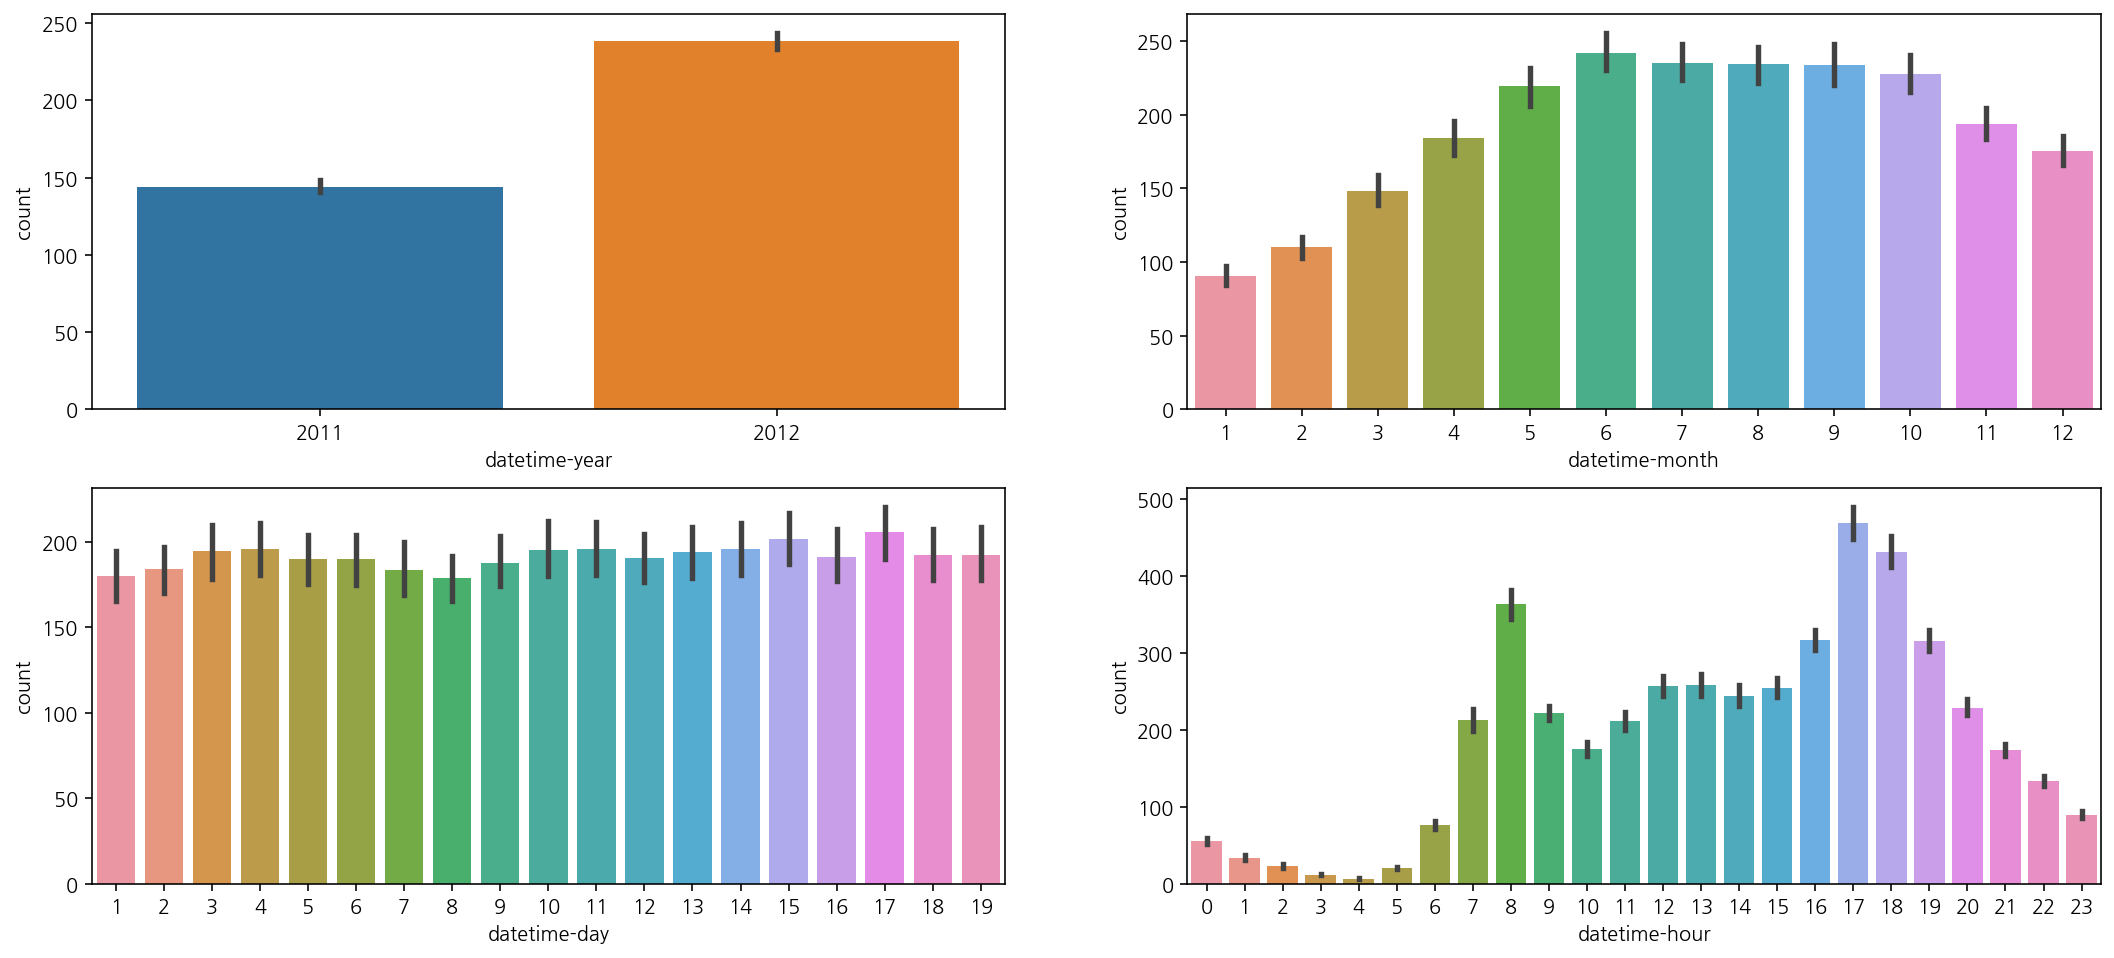

In [19]:
# 시간에 따른 count 값 시각화 분석
# subplot 설정과 set_size_inches설정
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 8)

# seaborn의 barplot을 이용해 시간대 별로 count데이터를 시각화 해 봅니다
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)

위 그래프에서 알 수 있는 내용은 다음과 같습니다.

**datetime-year**
* 2011년도의 자전거 대여량보다 2012년의 자전거 대여량이 높습니다. 이를 통해 알 수 있는 사실은, 이 경진대회를 주최한 [Capital Bikeshare](https://www.capitalbikeshare.com/)사가 꾸준히 성장하고 있다는 증거일 것입니다.

**datetime-month**
* 주로 여름(6~8월, 9월)에 많이 빌리며, 겨울(12월 ~ 2월)에는 자전거를 상대적으로 많이 빌리지 않습니다.
* 같은 겨울이라도 12월의 자전거 대여량이 1월의 자전거 대여량보다 **2배 가까이** 높습니다. 왜 그런지는 좀 더 자세하게 분석을 해봐야 알 것 같습니다.

**datetime-day**
* x축을 자세히 보면 1일부터 19일까지밖에 없습니다. 20일 이후의 데이터 부턴 **test 데이터**에 있습니다. 따라서 이 시각화를 통해 알 수 있는 것은 train(매년 매달, 1~19일치 데이터), test(매년 매달, 20 ~ 30(1)일치 데이터)라는 것이고 train, test데이터를 나누는 **기준**이 되는 컬럼입니다.
* 이런 경우 **datetime-day** 를 feature로 넣어주게 되면 특정 경우(기간, 범위)등에 대해서만 옳게되는 과적합(overfitting)현상이 발생할 수 있습니다. 따라서 이 컬럼을 사용하면 되려 정확도가 내려갈 가능성이 높으므로 해당 컬럼은 **feature**로 사용하지 않는 편이 바람직할 것 같습니다.

**datetime-hour**
* 새벽 시간에는 사람들이 자전거를 많이 빌리지 않으며, 오후 시간대(주 활동 시간대)에 상대적으로 자전거를 많이 빌리고 있습니다.
* 부각이 되는 시간대가 있는데 오전(7~9시)과, 오후저녁(17시~19시)입니다. 러시아워와 관련 있을 것 같습니다.

**datetime-minute & datetime-second**
* 이 컬럼들은 x축이 모두 0이므로 따로 기록이 되지 않는 것을 확인할 수 있습니다. 따라서 별도로 시각화를 진행하지 않았습니다.

### datetime year-month(연-월)

다음으로 조금 응용해서 연과 월을 붙여서 시각화를 진행해보겠습니다. 해당 시각화를 진행하기 위해 연과 월을 합친 새로운 컬럼을 생성합니다.

In [20]:
# datetime-year와 datetime-month를 합쳐 새로운 컬럼을 생성
# 하이픈(-)을 통해 합치므로 문자열 형태로 데이터를 변환 및 저장
train["datetime-year_month"] = train["datetime-year"].astype('str') + "-" + train["datetime-month"].astype("str")

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 36)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


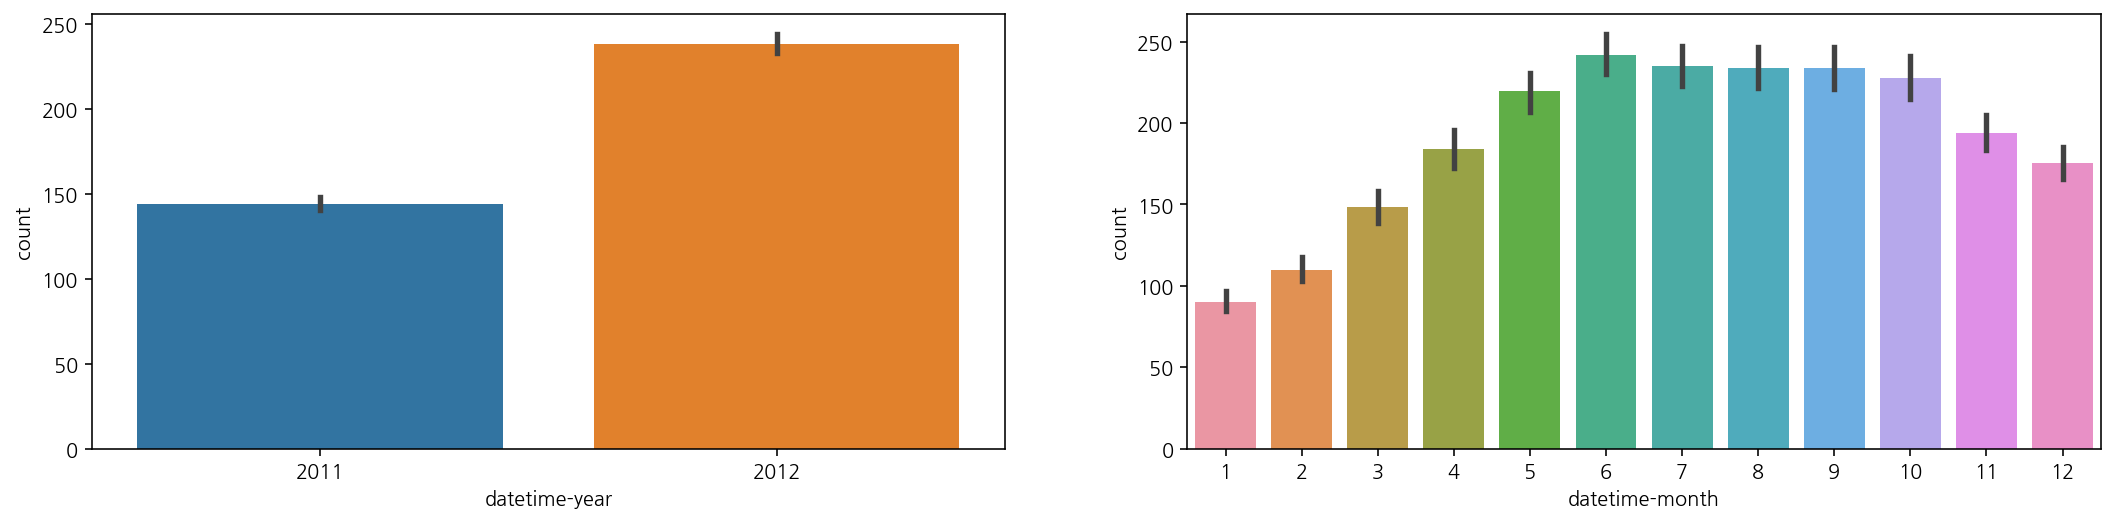

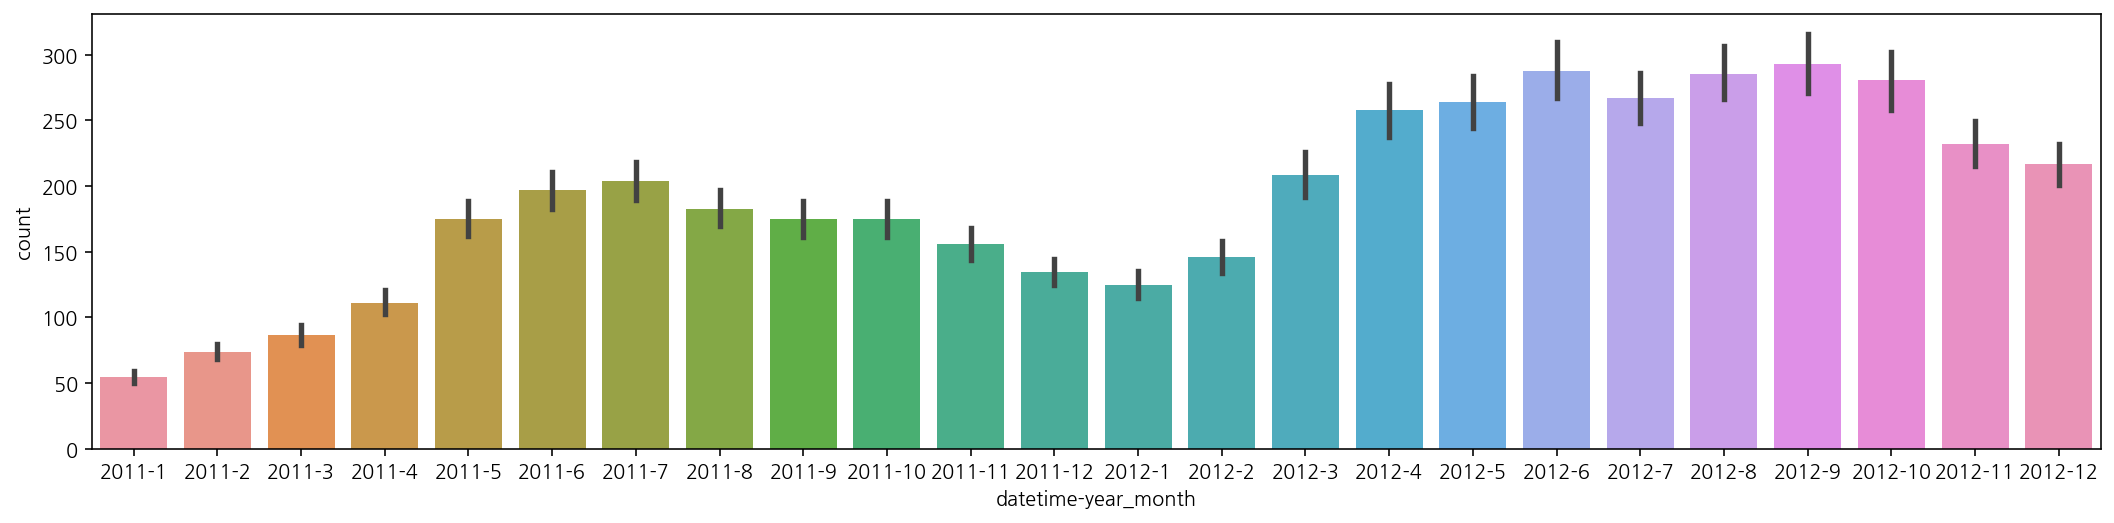

In [21]:
# 만든 데이터를 토대로 시각화를 진행해 봅니다.
# year와 month 따로 먼저 시각화를 하고 그 다음에 year_month 시각화 결과를 띄웁니다
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정.
figure.set_size_inches(18, 4)

# 연, 월별 자전거 대여량 시각화 출력
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

# year_month 부분
figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

# 연-월 합산 자전거 대여량 시각화 출력
sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

위 시각화 결과에서 알 수 있는 내용은 다음과 같습니다.

* [Capital Bikeshare](https://www.capitalbikeshare.com/)사의 자전거 대여량은 꾸준히 상승하고 있습니다
* 우상단 시각화를 보면(month 시각화), 12월의 자전거 대여량이 1월의 자전거 대여량보다 2배가량 높습니다
* 하지만 아래의 시각화(year_month 시각화)를 살펴보면, 2011년 12월의 자전거 대여량과 2012년 1월으 ㅣ자전거 대여량이 큰 차이가 없다는 사실을 확인 할 수 있습니다(12월이 항상 1월보다 두배의 대여량이라는 말이 아님)
* 그렇지만 2011년 1월 보다 2012년 12월의 대여량이 차이가 큰 것을 확인 할 수 있습니다(2배가 벌어진 원인이 되는 차이)

따라서, 12월 대여량이 1월 대여량보다 2배가량 더 높은 이유는
1) 자전거 대여량이 해가 갈 수록 꾸준히 증가하는 추세에 맞물려서
2) 이 과정에서 2012년 12월의 증가폭이 컸기 때문 입니다.
고객이 12월에 더 많이 빌리고 1월에는 특별히 더 적게 빌리지는 않는 것입니다.

이 부분이 머신러닝 알고리즘에 **feature** 의 형태로 대입될 시 과적합(overfitting)이 될 소지가 있습니다.(12월은 1월보다 2배 가까이 높게 라던지) 다음과 같은 해결책이 있습니다.

* **datetime-year_month**를 통채로 **One-Hot Encoding**을 해서 feature로 사용한다.
* 자전거 대여량이 꾸준히 성장하는 추세에 맞춰 count를 보정한다

그러나 쉽고 빠르게 머신러닝 정확도를 올리는 방법으로선 비효율적인 측면이 있기 때문에 **datetime-month** 컬럼 데이터는 사용하지 않겠습니다.

정리하면, 시간과 관련된 6개의 데이터 중 ```datetime-year```, ```datetime-hour``` 이렇게 2가지만 사용하도록 하겠습니다.

### datetime-hour

다음으로, **datetime-hour** 컬럼을 좀 더 상세하게 시각화 후 분석해 보겠습니다.
**datetime-hour**컬럼과 더불어 ```workingday(근무일)```과 ```datetime-dayofweek(요일)```분석도 같이 진행 해 보겠습니다.

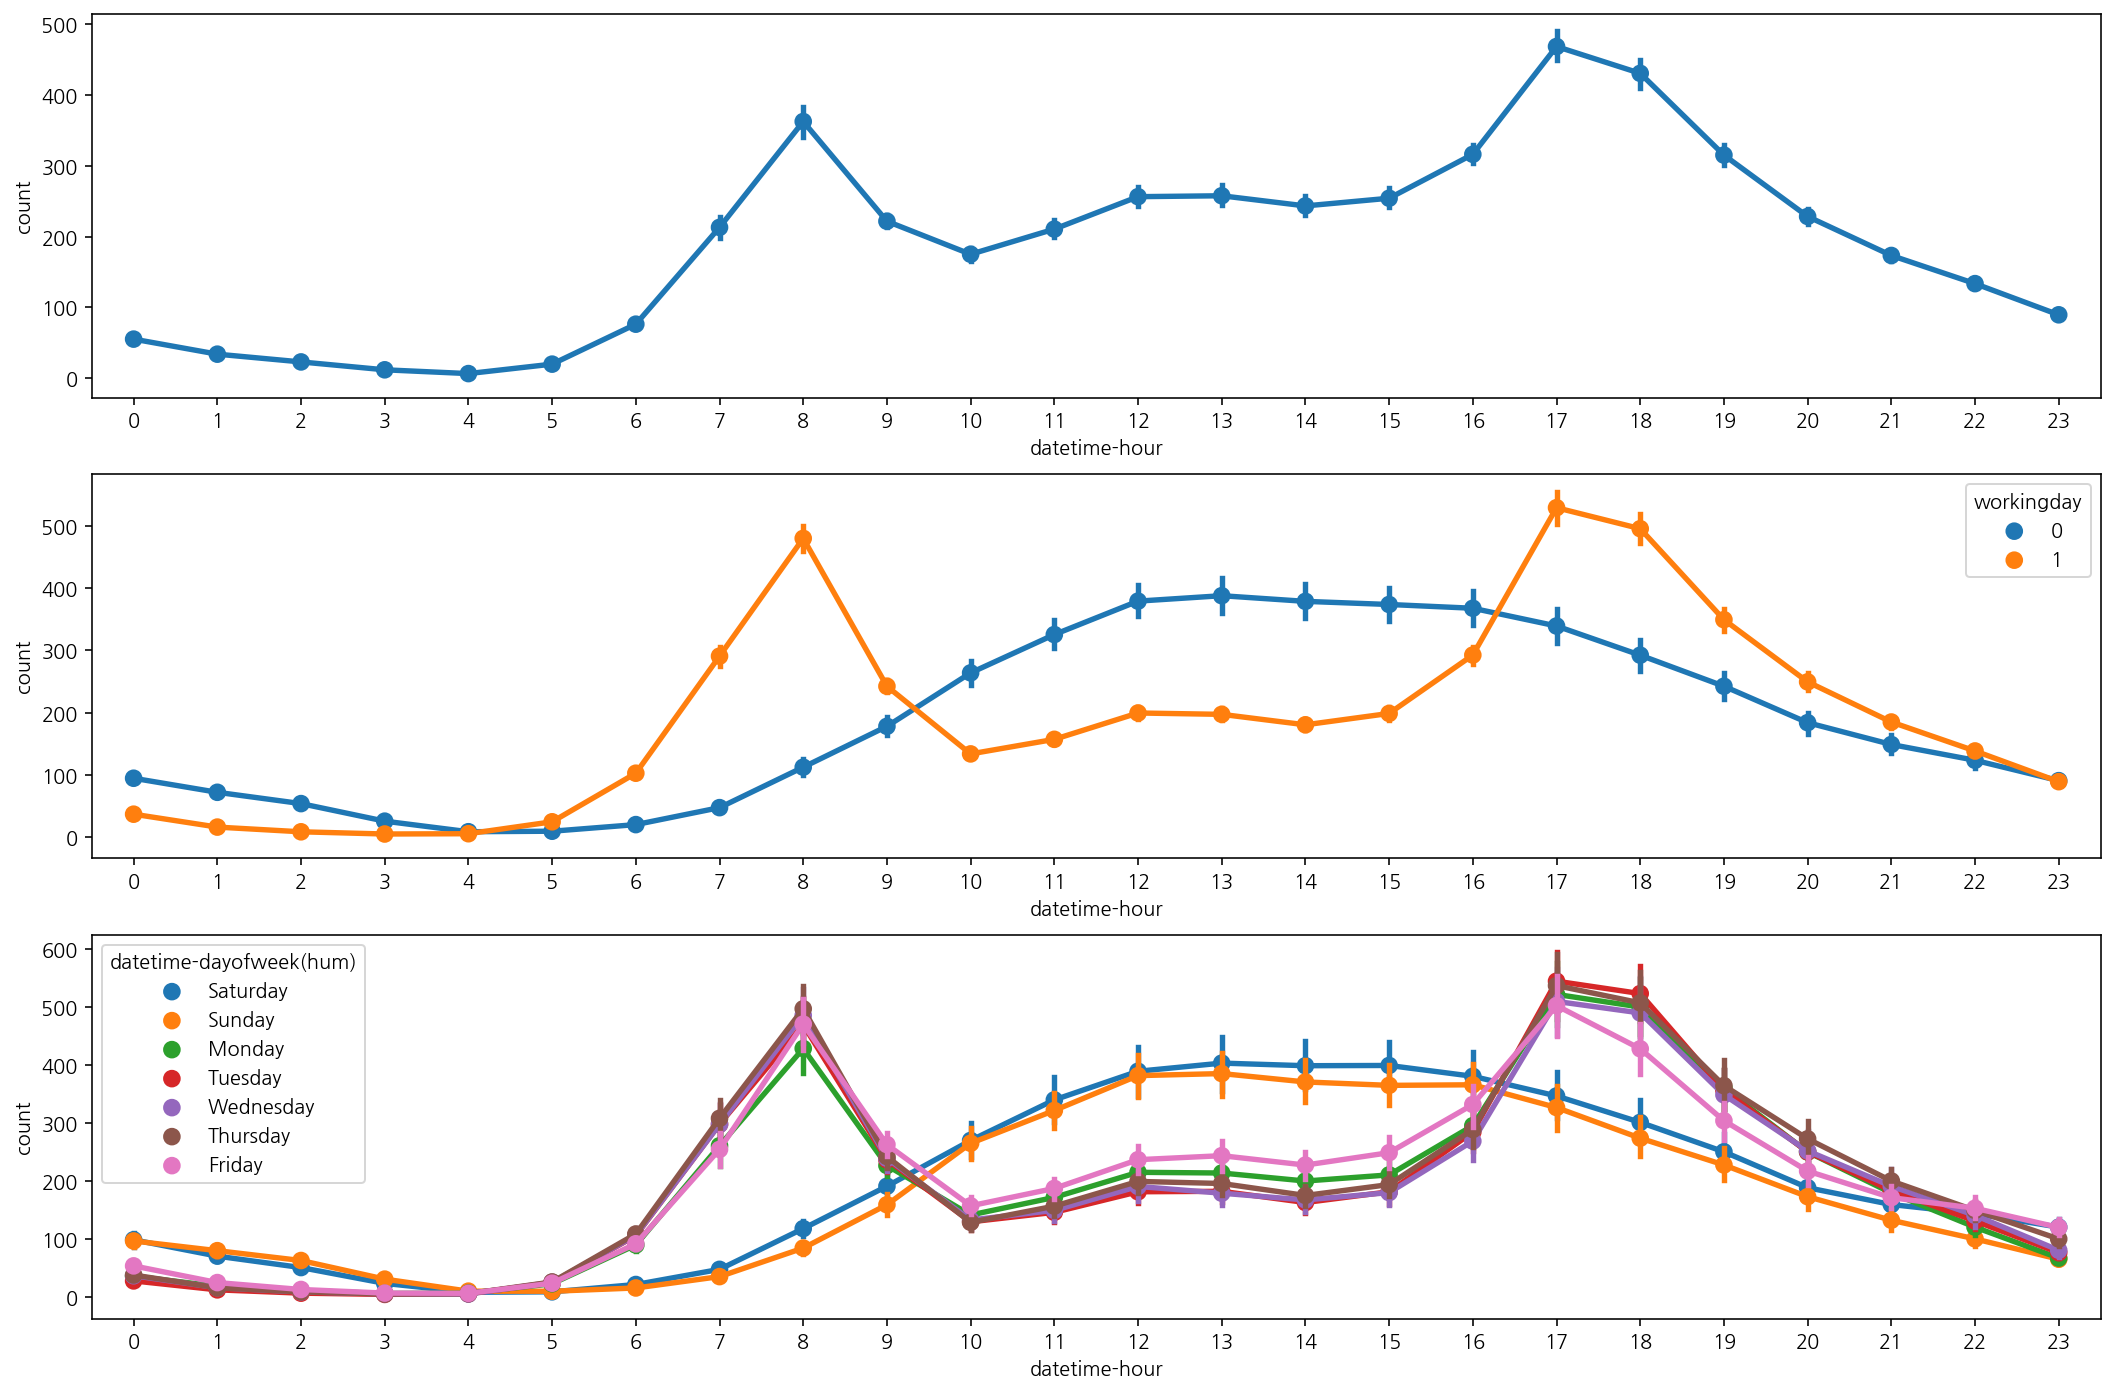

In [24]:
# subplot은 시각화 결과를 한 화면에 여러개를 띄울 수 있게 해 줍니다.
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# 시각화 사이즈는 18x12로 설정합니다.
figure.set_size_inches(18, 12)

# seaborn의 pointplot으로 시각당 자전거 대여량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

# 위 시각화와 더불어 workingday에 따른 자전거 대여량도 같이 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

# 마지막으로 요일에 따른 자전거 대여량 시각화도 진행해 봅니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek(hum)", ax=ax3)

위 그림을 통해 알 수 있는 내용은 다음과 같습니다.

* 고객들은 기본적으로 출근 시간(7~9시)과 퇴근 시간(16~19시)에 자전거를 많이 빌립니다.
* 이는 근무일(workingday == 1)에 해당되는 경우이며, 근무일이 아닐 경우(workingday == 0), 사람들은 출/퇴근시간에 자전거를 빌리지 않고, 오후 시간(10~16시 사이)에 자전거를 주로 빌립니다.

**요일(datetime-dayofweek)**별 자전거 대여량을 살펴보면 다음과 같습니다.
* 먼저 금요일을 살펴보면, 다른 주중(월~목)에 비해 퇴근시간(17~19시)에 상대적으로 자전거를 덜 빌리는 사실을 확인할 수 있었습니다. 추측을 해보면, 다른 이유(불금을 즐긴다, 대중교통을 이용한다)로 자전거를 이용하지 않았을 것입니다.
* 금요일을 살펴보면, 다른 주중 대여량에 비해 오후 대여량이 높은 것을 확인할 수 있습니다. 그 다음으로 월요일이 많습니다. 금요일과 월요일 대여량은 오후에도 어느정도 수요가 된다는 사실을 추측해 볼 수 있습니다.
* 주말 데이터를 살펴보면 토요일의 대여량 보다 일요일의 대여량이 상대적으로 적은 것을 확인할 수 있었습니다. 이는, 대외활동 피로도와 연관이(금,토 바깥에서 즐기고 일요일은 실내에서 쉴 가능성)있을것 같습니다.

이 분석을 통해 머신러닝에 대입할 **feature**로 ```workingday```와 ```datetime-dayofweek```을 동시에 넣게 되면 좀 더 좋은 예측치를 얻을 수 있을 것 같다는 사실을 알게 되었습니다.

### count 값 경향 분석

### 머신러닝 파트(Machine Learning Part)